## early stopping -> keras will automatically stop training based on a loss condition on the validation data passed during the fitting process 

## dropout layers -> layers are set to turn off nurons. To prevent over fitting..the drop out layer will drop a predefined user percentage of neurons units in the previous layer of each batch

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## measurments of tumors data

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer_data = pd.DataFrame(cancer["data"], columns=cancer["feature_names"])

In [5]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [6]:
cancer_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [7]:
cancer_data["target"] = cancer["target"]

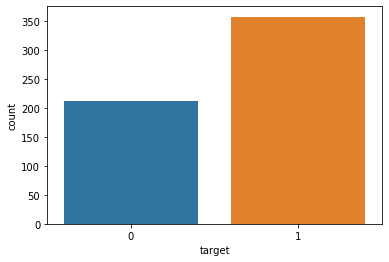

In [8]:
sns.countplot(x = "target", data=cancer_data)

## correlation between the features 

In [9]:
cancer_data.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


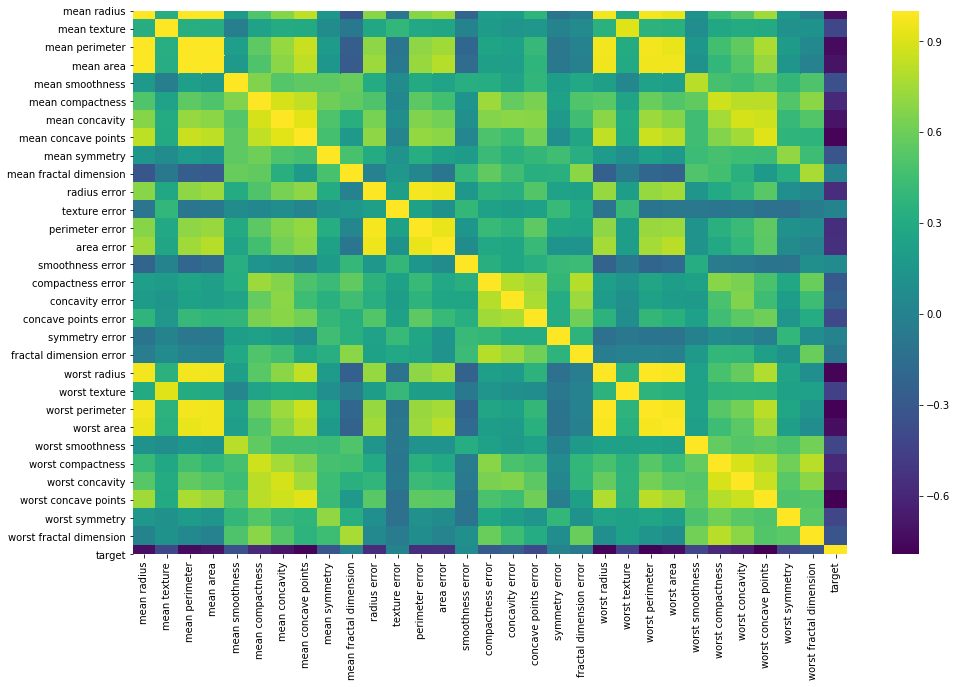

In [10]:
plt.figure(figsize=(16,10))
sns.heatmap(cancer_data.corr(), cmap="viridis")

## Corr to target

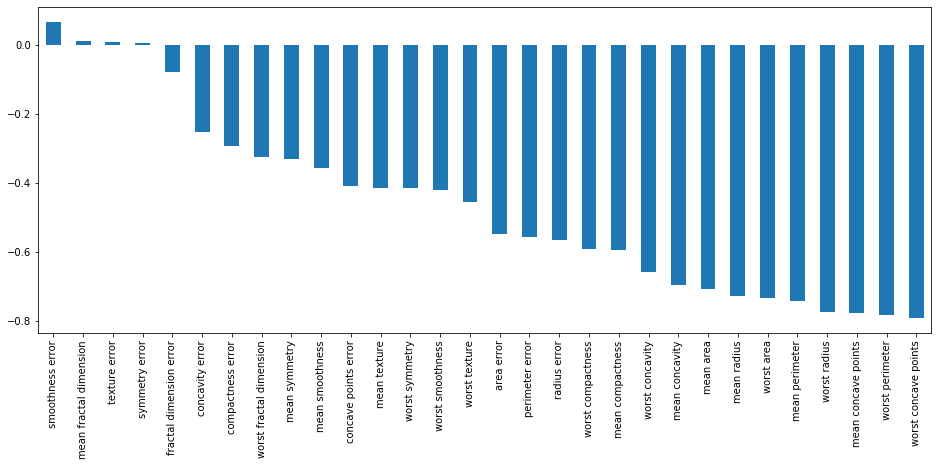

In [11]:
cancer_data.corr()["target"][:-1].sort_values(ascending = False).plot(kind= "bar", figsize = (16,6))

### preping the data for training

In [12]:
X = cancer_data.drop("target", axis=1).values
y = cancer_data["target"].values

## train test split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

### Scale data

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scalar = MinMaxScaler()

In [17]:
X_train =scalar.fit_transform(X_train)

In [18]:
X_test = scalar.transform(X_test)

### Creating the model and preventing overfitting

In [19]:
from tensorflow.keras.models import Sequential

In [20]:
from tensorflow.keras.layers import Dense, Dropout

## Model

In [21]:
X_train.shape

(426, 30)

In [22]:
model = Sequential()
model.add(Dense(units = 30, activation = "relu"))
model.add(Dense(units = 15, activation = "relu"))
model.add(Dense(units = 1, activation = "sigmoid"))
model.compile(loss = "binary_crossentropy", optimizer = "adam")

## Fit Model

In [23]:
model.fit(X_train,y_train, epochs=600, validation_data=(X_test, y_test))

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 2s 5ms/sample - loss: 0.6741 - val_loss: 0.6583
Epoch 2/600
426/426 [==============================] - 0s 299us/sample - loss: 0.6414 - val_loss: 0.6234
Epoch 3/600
426/426 [==============================] - 0s 320us/sample - loss: 0.6021 - val_loss: 0.5832
Epoch 4/600
426/426 [==============================] - 0s 332us/sample - loss: 0.5600 - val_loss: 0.5403
Epoch 5/600
426/426 [==============================] - 0s 334us/sample - loss: 0.5177 - val_loss: 0.4971
Epoch 6/600
426/426 [==============================] - 0s 298us/sample - loss: 0.4749 - val_loss: 0.4566
Epoch 7/600
426/426 [==============================] - 0s 300us/sample - loss: 0.4365 - val_loss: 0.4136
Epoch 8/600
426/426 [==============================] - 0s 287us/sample - loss: 0.3993 - val_loss: 0.3757
Epoch 9/600
426/426 [==============================] - 0s 314us/sample - loss: 0.3641 - val_loss: 0.3420
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 269us/sample - loss: 0.0579 - val_loss: 0.1002
Epoch 79/600
426/426 [==============================] - 0s 312us/sample - loss: 0.0555 - val_loss: 0.1025
Epoch 80/600
426/426 [==============================] - 0s 307us/sample - loss: 0.0560 - val_loss: 0.0984
Epoch 81/600
426/426 [==============================] - 0s 278us/sample - loss: 0.0553 - val_loss: 0.0996
Epoch 82/600
426/426 [==============================] - 0s 299us/sample - loss: 0.0560 - val_loss: 0.1056
Epoch 83/600
426/426 [==============================] - 0s 274us/sample - loss: 0.0586 - val_loss: 0.0962
Epoch 84/600
426/426 [==============================] - 0s 296us/sample - loss: 0.0582 - val_loss: 0.1065
Epoch 85/600
426/426 [==============================] - 0s 274us/sample - loss: 0.0559 - val_loss: 0.0962
Epoch 86/600
426/426 [==============================] - 0s 274us/sample - loss: 0.0546 - val_loss: 0.1137
Epoch 87/600
426/426 [========================

Epoch 155/600
426/426 [==============================] - 0s 279us/sample - loss: 0.0466 - val_loss: 0.1228
Epoch 156/600
426/426 [==============================] - 0s 276us/sample - loss: 0.0478 - val_loss: 0.1225
Epoch 157/600
426/426 [==============================] - 0s 307us/sample - loss: 0.0487 - val_loss: 0.1257
Epoch 158/600
426/426 [==============================] - 0s 298us/sample - loss: 0.0530 - val_loss: 0.1159
Epoch 159/600
426/426 [==============================] - 0s 288us/sample - loss: 0.0520 - val_loss: 0.1264
Epoch 160/600
426/426 [==============================] - 0s 289us/sample - loss: 0.0449 - val_loss: 0.1168
Epoch 161/600
426/426 [==============================] - 0s 280us/sample - loss: 0.0461 - val_loss: 0.1240
Epoch 162/600
426/426 [==============================] - 0s 305us/sample - loss: 0.0467 - val_loss: 0.1342
Epoch 163/600
426/426 [==============================] - 0s 279us/sample - loss: 0.0449 - val_loss: 0.1192
Epoch 164/600
426/426 [==============

426/426 [==============================] - 0s 279us/sample - loss: 0.0425 - val_loss: 0.1291
Epoch 232/600
426/426 [==============================] - 0s 274us/sample - loss: 0.0416 - val_loss: 0.1511
Epoch 233/600
426/426 [==============================] - 0s 285us/sample - loss: 0.0420 - val_loss: 0.1375
Epoch 234/600
426/426 [==============================] - 0s 280us/sample - loss: 0.0408 - val_loss: 0.1435
Epoch 235/600
426/426 [==============================] - 0s 304us/sample - loss: 0.0418 - val_loss: 0.1402
Epoch 236/600
426/426 [==============================] - 0s 297us/sample - loss: 0.0423 - val_loss: 0.1426
Epoch 237/600
426/426 [==============================] - 0s 298us/sample - loss: 0.0396 - val_loss: 0.1335
Epoch 238/600
426/426 [==============================] - 0s 295us/sample - loss: 0.0403 - val_loss: 0.1390
Epoch 239/600
426/426 [==============================] - 0s 290us/sample - loss: 0.0408 - val_loss: 0.1362
Epoch 240/600
426/426 [============================

426/426 [==============================] - 0s 277us/sample - loss: 0.0372 - val_loss: 0.1591
Epoch 308/600
426/426 [==============================] - 0s 306us/sample - loss: 0.0367 - val_loss: 0.1458
Epoch 309/600
426/426 [==============================] - 0s 275us/sample - loss: 0.0374 - val_loss: 0.1668
Epoch 310/600
426/426 [==============================] - 0s 287us/sample - loss: 0.0371 - val_loss: 0.1493
Epoch 311/600
426/426 [==============================] - 0s 310us/sample - loss: 0.0369 - val_loss: 0.1609
Epoch 312/600
426/426 [==============================] - 0s 291us/sample - loss: 0.0365 - val_loss: 0.1550
Epoch 313/600
426/426 [==============================] - 0s 290us/sample - loss: 0.0373 - val_loss: 0.1574
Epoch 314/600
426/426 [==============================] - 0s 281us/sample - loss: 0.0375 - val_loss: 0.1578
Epoch 315/600
426/426 [==============================] - 0s 308us/sample - loss: 0.0397 - val_loss: 0.1760
Epoch 316/600
426/426 [============================

426/426 [==============================] - 0s 356us/sample - loss: 0.0323 - val_loss: 0.1607
Epoch 384/600
426/426 [==============================] - 0s 341us/sample - loss: 0.0383 - val_loss: 0.1693
Epoch 385/600
426/426 [==============================] - 0s 310us/sample - loss: 0.0337 - val_loss: 0.1766
Epoch 386/600
426/426 [==============================] - 0s 303us/sample - loss: 0.0331 - val_loss: 0.1644
Epoch 387/600
426/426 [==============================] - 0s 318us/sample - loss: 0.0321 - val_loss: 0.1871
Epoch 388/600
426/426 [==============================] - 0s 293us/sample - loss: 0.0349 - val_loss: 0.1751
Epoch 389/600
426/426 [==============================] - 0s 305us/sample - loss: 0.0323 - val_loss: 0.1753
Epoch 390/600
426/426 [==============================] - 0s 324us/sample - loss: 0.0383 - val_loss: 0.1604
Epoch 391/600
426/426 [==============================] - 0s 287us/sample - loss: 0.0334 - val_loss: 0.1796
Epoch 392/600
426/426 [============================

426/426 [==============================] - 0s 321us/sample - loss: 0.0346 - val_loss: 0.1878
Epoch 460/600
426/426 [==============================] - 0s 330us/sample - loss: 0.0302 - val_loss: 0.1836
Epoch 461/600
426/426 [==============================] - 0s 300us/sample - loss: 0.0314 - val_loss: 0.2016
Epoch 462/600
426/426 [==============================] - 0s 292us/sample - loss: 0.0300 - val_loss: 0.1952
Epoch 463/600
426/426 [==============================] - 0s 309us/sample - loss: 0.0308 - val_loss: 0.1780
Epoch 464/600
426/426 [==============================] - 0s 331us/sample - loss: 0.0366 - val_loss: 0.1897
Epoch 465/600
426/426 [==============================] - 0s 308us/sample - loss: 0.0341 - val_loss: 0.1951
Epoch 466/600
426/426 [==============================] - 0s 301us/sample - loss: 0.0422 - val_loss: 0.1739
Epoch 467/600
426/426 [==============================] - 0s 292us/sample - loss: 0.0319 - val_loss: 0.1852
Epoch 468/600
426/426 [============================

426/426 [==============================] - 0s 287us/sample - loss: 0.0313 - val_loss: 0.2184
Epoch 536/600
426/426 [==============================] - 0s 293us/sample - loss: 0.0290 - val_loss: 0.1959
Epoch 537/600
426/426 [==============================] - 0s 303us/sample - loss: 0.0275 - val_loss: 0.2114
Epoch 538/600
426/426 [==============================] - 0s 291us/sample - loss: 0.0273 - val_loss: 0.1969
Epoch 539/600
426/426 [==============================] - 0s 310us/sample - loss: 0.0287 - val_loss: 0.2008
Epoch 540/600
426/426 [==============================] - 0s 285us/sample - loss: 0.0293 - val_loss: 0.2009
Epoch 541/600
426/426 [==============================] - 0s 273us/sample - loss: 0.0265 - val_loss: 0.2005
Epoch 542/600
426/426 [==============================] - 0s 301us/sample - loss: 0.0295 - val_loss: 0.2320
Epoch 543/600
426/426 [==============================] - 0s 299us/sample - loss: 0.0281 - val_loss: 0.1909
Epoch 544/600
426/426 [============================

### lets see out performance. Overfitting has occurred-> to training data set. Training for two many eopcs. So wewill need to do early stopping. Bases on validation loss

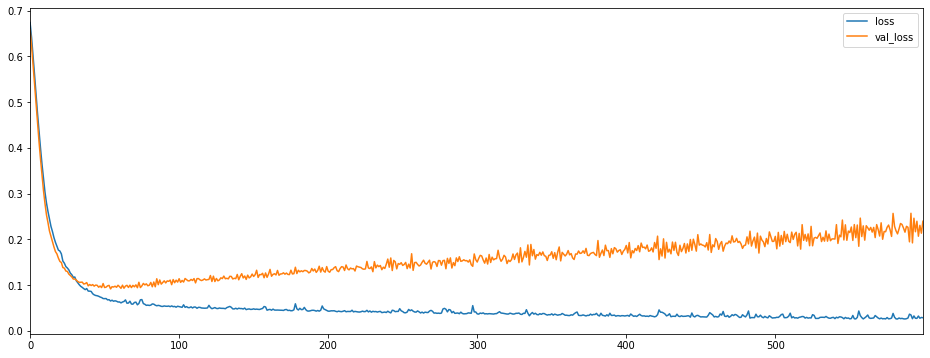

In [24]:
pd.DataFrame(model.history.history).plot(figsize = (16,6))

In [25]:
model = Sequential()
model.add(Dense(units = 30, activation = "relu"))
model.add(Dense(units = 15, activation = "relu"))
model.add(Dense(units = 1, activation = "sigmoid"))
model.compile(loss = "binary_crossentropy", optimizer = "adam")

### we will use callbacks to prevent the overftting of our data

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

## what we have to do is find a metric to monitor-> in our case Validation loss.. minumum changes -> patience -> number of epocs with no emprovments-> training will be stopped

## step 1

In [27]:
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=25)

## fit model with stop

In [28]:
model.fit(X_train,y_train, epochs=600, validation_data=(X_test, y_test),
         callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 3ms/sample - loss: 0.6774 - val_loss: 0.6429
Epoch 2/600
426/426 [==============================] - 0s 302us/sample - loss: 0.6219 - val_loss: 0.5911
Epoch 3/600
426/426 [==============================] - 0s 301us/sample - loss: 0.5710 - val_loss: 0.5367
Epoch 4/600
426/426 [==============================] - 0s 311us/sample - loss: 0.5121 - val_loss: 0.4749
Epoch 5/600
426/426 [==============================] - 0s 306us/sample - loss: 0.4574 - val_loss: 0.4232
Epoch 6/600
426/426 [==============================] - 0s 305us/sample - loss: 0.4073 - val_loss: 0.3759
Epoch 7/600
426/426 [==============================] - 0s 300us/sample - loss: 0.3653 - val_loss: 0.3343
Epoch 8/600
426/426 [==============================] - 0s 325us/sample - loss: 0.3313 - val_loss: 0.2993
Epoch 9/600
426/426 [==============================] - 0s 308us/sample - loss: 0.2993 - val_loss: 0.2711
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 305us/sample - loss: 0.0563 - val_loss: 0.1045
Epoch 79/600
426/426 [==============================] - 0s 284us/sample - loss: 0.0554 - val_loss: 0.1068
Epoch 80/600
426/426 [==============================] - 0s 332us/sample - loss: 0.0544 - val_loss: 0.0998
Epoch 81/600
426/426 [==============================] - 0s 305us/sample - loss: 0.0564 - val_loss: 0.1158
Epoch 82/600
426/426 [==============================] - 0s 304us/sample - loss: 0.0543 - val_loss: 0.1005
Epoch 83/600
426/426 [==============================] - 0s 294us/sample - loss: 0.0546 - val_loss: 0.1031
Epoch 84/600
426/426 [==============================] - 0s 299us/sample - loss: 0.0540 - val_loss: 0.1100
Epoch 85/600
426/426 [==============================] - 0s 290us/sample - loss: 0.0535 - val_loss: 0.1074
Epoch 86/600
426/426 [==============================] - 0s 293us/sample - loss: 0.0552 - val_loss: 0.1139
Epoch 87/600
426/426 [========================

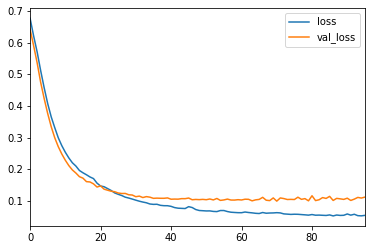

In [29]:
pd.DataFrame(model.history.history).plot()

#### Drop out layers -> turn off percentage of neirons randomly, normally between 0.2,0.5 -> essentially half of the neurones durig each batch will  randomlly be turned off for each epoch.

In [30]:
from tensorflow.keras.layers import Dropout

In [31]:
model = Sequential()
model.add(Dense(units = 30, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = 15, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = 1, activation = "sigmoid"))
model.compile(loss = "binary_crossentropy", optimizer = "adam")

## we will use the dropouts in combnation with early stop

In [32]:
model.fit(X_train,y_train, epochs=600, validation_data=(X_test, y_test),callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 2s 4ms/sample - loss: 0.7646 - val_loss: 0.7011
Epoch 2/600
426/426 [==============================] - 0s 321us/sample - loss: 0.7173 - val_loss: 0.6724
Epoch 3/600
426/426 [==============================] - 0s 336us/sample - loss: 0.6870 - val_loss: 0.6616
Epoch 4/600
426/426 [==============================] - 0s 340us/sample - loss: 0.6741 - val_loss: 0.6550
Epoch 5/600
426/426 [==============================] - 0s 335us/sample - loss: 0.6605 - val_loss: 0.6423
Epoch 6/600
426/426 [==============================] - 0s 353us/sample - loss: 0.6458 - val_loss: 0.6235
Epoch 7/600
426/426 [==============================] - 0s 320us/sample - loss: 0.6281 - val_loss: 0.6032
Epoch 8/600
426/426 [==============================] - 0s 354us/sample - loss: 0.6104 - val_loss: 0.5796
Epoch 9/600
426/426 [==============================] - 0s 337us/sample - loss: 0.5839 - val_loss: 0.5537
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 317us/sample - loss: 0.1427 - val_loss: 0.1007
Epoch 79/600
426/426 [==============================] - 0s 317us/sample - loss: 0.1493 - val_loss: 0.1222
Epoch 80/600
426/426 [==============================] - 0s 325us/sample - loss: 0.1335 - val_loss: 0.1021
Epoch 81/600
426/426 [==============================] - 0s 316us/sample - loss: 0.1479 - val_loss: 0.0905
Epoch 82/600
426/426 [==============================] - 0s 334us/sample - loss: 0.1358 - val_loss: 0.1107
Epoch 83/600
426/426 [==============================] - 0s 309us/sample - loss: 0.1240 - val_loss: 0.0983
Epoch 84/600
426/426 [==============================] - 0s 350us/sample - loss: 0.1410 - val_loss: 0.0877
Epoch 85/600
426/426 [==============================] - 0s 315us/sample - loss: 0.1278 - val_loss: 0.0945
Epoch 86/600
426/426 [==============================] - 0s 329us/sample - loss: 0.1192 - val_loss: 0.0959
Epoch 87/600
426/426 [========================

### Overeview -> Great improvment  inthe performance -> both are dropping significantly and they flattening out at the same rate

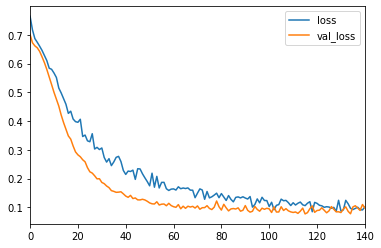

In [33]:
pd.DataFrame(model.history.history).plot()

### lets test on out model for precitions using Keras

In [34]:
predictions = model.predict_classes(X_test)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.99      0.95      0.97        88

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



In [37]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 4 84]]


In [62]:
from random import randint
random_index = randint(1,len(cancer_data))
new_cancer_cell = cancer_data.drop("target", axis=1).iloc[random_index]

In [63]:
new_cancer_cell = new_cancer_cell.values.reshape(-1,30)

### Transform new data 
- remember we trained our model on scaled data so we will need to scale the new cell 

In [64]:
new_cancer_cell = scalar.transform(new_cancer_cell)

In [65]:
model.predict_classes(new_cancer_cell)

array([[0]], dtype=int32)

## Validating Predictions

In [66]:
cancer_data.iloc[random_index]["target"]

0.0